<a href="https://colab.research.google.com/github/mmaguero/diploma_fpuna_nlp_ia/blob/master/2025/final_project_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROYECTO (Hasta Guía).**

Fuente de los datos:
https://www.kaggle.com/datasets/yasserh/titanic-dataset

Enlace de acceso a los datos:
https://drive.google.com/file/d/14m51hhZKYXxuY4wuzKy2gGaX9eyL7euK/view?usp=sharing




Importamos las librerías:

In [ ]:
## Para datos
import pandas as pd
import numpy as np
## Para gráficos
import matplotlib.pyplot as plt


Abrimos el data-set como un dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

Entrada: Identificador del archivo.

Salida: Una tabla DataFrame de Pandas.

In [ ]:
file_id = '14m51hhZKYXxuY4wuzKy2gGaX9eyL7euK'
url = f'https://drive.google.com/uc?id={file_id}&export=download'
dtf = pd.read_csv(url)


# Análisis exploratorio de datos

Visualizamos el conjunto de datos: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [ ]:
dtf.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Vemos tamaño del conjunto de datos: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

Entrada: Tupla con las dimensiones del DataFrame.

In [ ]:
print(dtf.shape)

(887, 8)


Vemos información general https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

Entrada: Sumario del DataFrame.

In [ ]:
print(dtf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB
None


Vemos las estadísticas de los atributos numéricos: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [ ]:
dtf.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


Vemos estadísticas de atributos categóricos.

Entrada: Lista con tipos de atributos excluídos anteriormente por el método "describe".

In [ ]:
dtf.describe(include=["object", "bool"])

,Name,Sex
count,887,887
unique,887,2
top,Mr. Owen Harris Braund,male
freq,1,573


Vemos frecuencias de las variables individuales discretas con clases repetidas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

Aplicamos histogramas cuando son demasiadas clases numéricas:

In [ ]:
dtf["Survived"].value_counts()

0    545
1    342
Name: Survived, dtype: int64

In [ ]:
dtf["Pclass"].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
dtf["Sex"].value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [ ]:
dtf["Age"].value_counts()

22.00    39
28.00    37
18.00    36
21.00    34
24.00    34
         ..
0.92      1
23.50     1
36.50     1
55.50     1
74.00     1
Name: Age, Length: 89, dtype: int64

<Axes: >

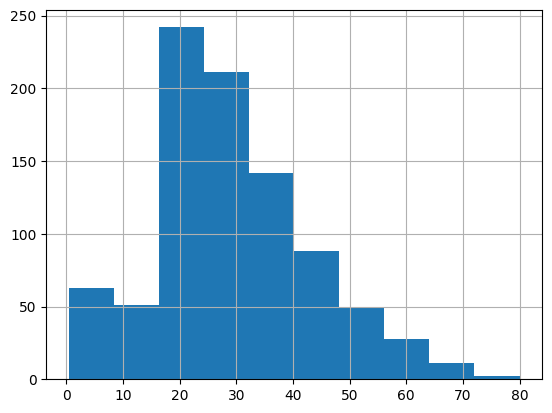

In [ ]:
dtf["Age"].hist()

In [ ]:
dtf["Siblings/Spouses Aboard"].value_counts()

0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings/Spouses Aboard, dtype: int64

In [ ]:
dtf["Parents/Children Aboard"].value_counts()

0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parents/Children Aboard, dtype: int64

In [ ]:
dtf["Fare"].value_counts()

8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

<Axes: >

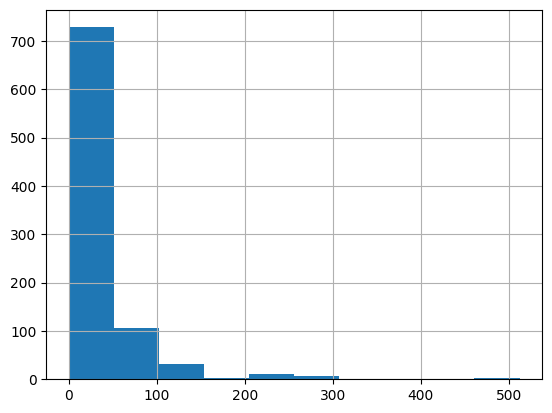

In [ ]:
dtf["Fare"].hist()

# Preprocesamiento

Codificación numérica de variables binarias: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html

Entrada: Datos brutos.

Salida: Nuevo conjunto de datos (DataFrame de Pandas) donde el atributo sexo es transformado de categórico a numérico.


In [ ]:
lista = {"Sex": {"male": 0, "female": 1}}
dtf = dtf.replace(lista)
dtf.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


Vemos de vuelta en que clase de atributo se transformó "Sex".

Entrada: Sumario del DataFrame.

In [ ]:
print(dtf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    int64  
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.6+ KB
None


Eliminamos el atributo "Name" porque no podemos aprovecharlo de ninguna manera: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

Entrada: Lista con nombres de atributos a eliminar.

Salida: Nuevo conjunto de datos (DataFrame de Pandas) sin el atributo "Name".

In [ ]:
dtf=dtf.drop(['Name'], axis=1)
dtf.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


Aplicamos normalización Min-Max de atributos.

Salida: Nuevo conjunto de datos (DataFrame de Pandas) con todos los atributos normalizados.

In [ ]:
dtf_n=(dtf-dtf.min())/(dtf.max()-dtf.min())
dtf_n.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0.0,1.0,0.0,0.271174,0.125,0.0,0.014151
1,1.0,0.0,1.0,0.472229,0.125,0.0,0.139136
2,1.0,1.0,1.0,0.321438,0.000,0.0,0.015469
3,1.0,0.0,1.0,0.434531,0.125,0.0,0.103644
4,0.0,1.0,0.0,0.434531,0.000,0.0,0.015713


# Aplicación de modelos.

## *KMEANS con normalización*

Importamos la clase para KMEANS:

https://scikit-learn.org/stable/modules/clustering.html#k-means

In [ ]:
from sklearn.cluster import KMeans

Seleccionamos número de clusters por el criterio del arco sobre la métrica inercia definida como la suma de las distancias al cuadrado de las muestras a su centro de conglomerado más cercano, ponderada por los pesos de la muestra si se han proporcionado.

**Para cada k de 1 a 11:**

Entradas: Número de clusters k, una semilla aleatoria 42 y el conjunto de datos normalizado dtf_n (DataFrame de Pandas).

Salida: El valor de inercia del KMEANS para k agregado a la lista sse.

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dtf_n)
    sse.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Graficamos el arco obtenido según la métrica de Inercia

Entradas: Un objeto range que denota una secuencia del 1 al 11 y la lista sse.

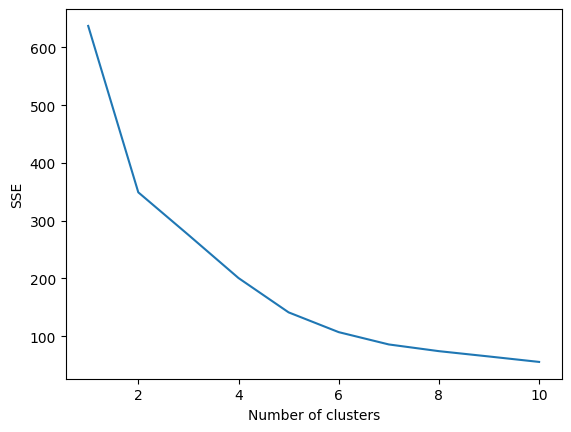

In [ ]:
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

A partir de la gráfica y por el criterio del arco se concluye apropiado aplicar el KMEANS para un rango entre 2 y 5 clusters.

## KMEANS sin normalización

Seleccionamos número de clusters por el criterio del arco sobre la métrica inercia definida como la suma de las distancias al cuadrado de las muestras a su centro de conglomerado más cercano, ponderada por los pesos de la muestra si se han proporcionado.

**Para cada k de 1 a 10:**

Entradas: Número de clusters k, una semilla aleatoria 42 y el conjunto de datos sin normalizar dtf (DataFrame de Pandas).

Salida: El valor de inercia del KMEANS agregado a la lista sse.

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dtf)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Graficamos el arco obtenido según la métrica de Inercia

Entradas: Un objeto range que denota una secuencia del 1 al 11 y la lista sse.

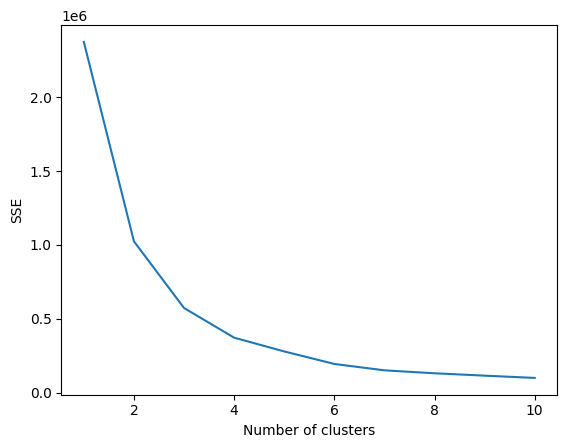

In [ ]:
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

A partir de la gráfica y por el criterio del arco se concluye apropiado aplicar el KMEANS para un rango entre 2 y 4 clusters.

# Evaluación

Importamos la clase para aplicar la medida de Silhouette:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

In [ ]:
from sklearn.metrics import silhouette_score

Evaluamos la medida de Silhouette para KMEANS en datos sin normalizar en un rango de 2 a 5 clusters.

**Para cada k de 2 a 5:**

Entrada: Número de clusters k, una semilla aleatoria 42 y el conjunto de datos dtf sin normalizar (DataFrame de Pandas).

Salida: El valor de la medida de Silhouette del KMEANS sobre dtf agregado a la lista A.

In [ ]:
A = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dtf)
    clusters = kmeans.predict(dtf)
    A.append(silhouette_score(dtf, clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Evaluamos la medida de Silhouette para KMEANS en datos normalizados en un rango de 2 a 5 clusters.

**Para cada k de 2 a 5:**

Entrada: Número de clusters k, una semilla aleatoria 42 y el conjunto de datos dtf_n normalizados (DataFrame de Pandas).

Salida: El valor de la medida de Silhouette del KMEANS sobre dtf agregado a la lista B.

In [ ]:
B = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dtf_n)
    clusters2 = kmeans.predict(dtf_n)
    B.append(silhouette_score(dtf_n, clusters2))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Graficamos los resultados para ambas aplicaciones de K-MEANS.
Entradas: Las listas A y B con los valores de inercia y un objeto range que denota una secuencia del 2 al 5.

Entrada:
Las listas A y B, un objeto range de 2 a 5.

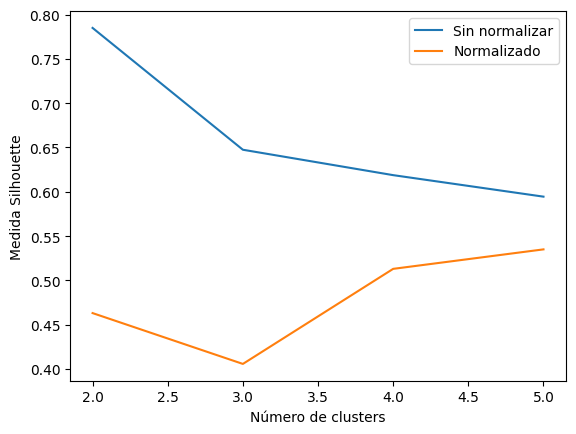

In [ ]:
plt.plot(range(2, 6), A, label='Sin normalizar')
plt.plot(range(2, 6), B, label='Normalizado')
plt.xlabel('Número de clusters')
plt.ylabel('Medida Silhouette')
plt.legend()
plt.show()

[PONER UNA INTERPRETACION DE LAS TABLAS O FIGURAS OBTENIDAS]

# Discusión

La discusión deberá contener:

1.   Una justificación de la metodología elegida en caso de que no se haya hecho antes a medida que se aplicaba cada técnica.
2.   Un análisis imparcial de como los resultados de la evaluación satisfacen como solución al problema propuesto en el anteproyecto, este deberá argumentar el porqué de cualquier afirmación que se haga.
3.   Argumentar si los datos o el modelo presentan algún problema que impactó en los resultados y de haber algún problema diagnosticarlo de forma clara y precisa.
